# PIL img lut exploration

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

print(f'Python {sys.version}')
print(f'NumPy {np.version.full_version}')

Python 3.13.0 (main, Oct  8 2024, 00:00:00) [GCC 14.2.1 20240912 (Red Hat 14.2.1-3)]
NumPy 2.1.2


(3837, 1937)
(1937, 3837) 2


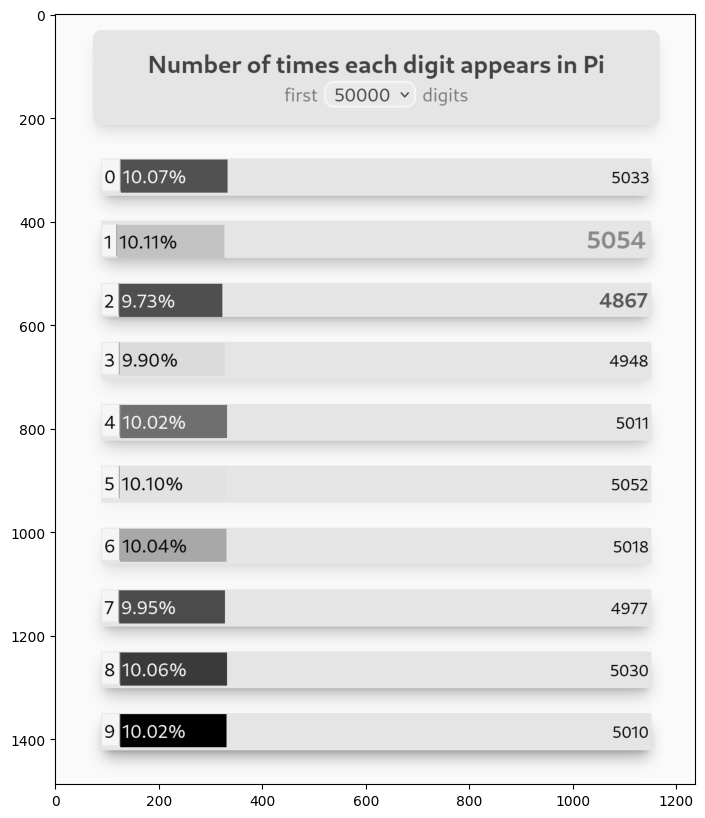

In [2]:
from pprint import pprint


img = Image.open('pi-day-2024-histogram.png')
img = img.convert('L')
print(img.size)
# img = img.crop((1000, 150, img.size[0]-1200, img.size[1]-100))
# print(img.size)
npimg = np.array(img.getdata())
npimg = npimg.reshape(img.size[::-1])
# npimg = npimg.reshape(img.size[::])
print(npimg.shape, npimg.ndim)
npimg = npimg[150:-300, 1300:-1300]

plt.figure(figsize=(10, 10))
plt.imshow(npimg, cmap='gray')

In [3]:
def sigmoid_lut(n=1):
    x = np.linspace(-1, 1, 256)
    lut = 1 / (1 + np.exp(-n*x))
    lut -= lut.min()
    lut /= lut.max()
    lut *= 255
    return lut.astype(np.uint8)


sigmoid_lut(5), sigmoid_lut(3)

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          1,   1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,
          3,   3,   3,   3,   3,   4,   4,   4,   4,   4,   5,   5,   5,
          6,   6,   6,   7,   7,   7,   8,   8,   8,   9,   9,  10,  10,
         10,  11,  11,  12,  13,  13,  14,  14,  15,  16,  16,  17,  18,
         18,  19,  20,  21,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  33,  34,  35,  36,  37,  39,  40,  42,  43,  45,  46,
         48,  49,  51,  53,  54,  56,  58,  60,  61,  63,  65,  67,  69,
         71,  73,  76,  78,  80,  82,  84,  87,  89,  91,  94,  96,  98,
        101, 103, 106, 108, 111, 113, 116, 118, 121, 123, 126, 128, 131,
        133, 136, 138, 141, 143, 146, 148, 151, 153, 156, 158, 160, 163,
        165, 167, 170, 172, 174, 176, 178, 181, 183, 185, 187, 189, 191,
        193, 194, 196, 198, 200, 201, 203, 205, 206, 208, 209, 211, 212,
        214, 215, 217, 218, 219, 220, 221, 223, 224

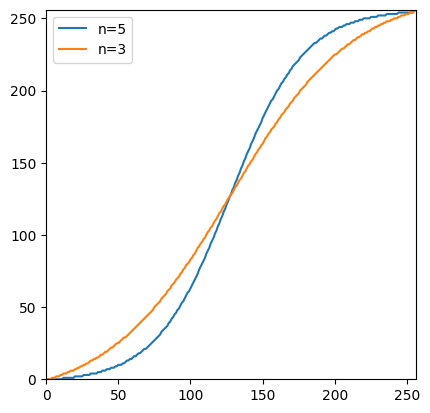

In [4]:
plt.subplot(111, aspect='equal')
plt.plot(sigmoid_lut(5), label='n=5')
plt.plot(sigmoid_lut(3), label='n=3')
plt.xlim(0, 256)
plt.ylim(0, 256)
plt.legend()

In [5]:
def lut_me(img: np.ndarray, lut):
    rows, cols = img.shape
    out = np.empty_like(img)
    for row in range(rows):
        for col in range(cols):
            out[row, col] = lut[img[row, col]]
    return out

In [6]:
%timeit lut_me(npimg, sigmoid_lut(5))

351 ms ± 9.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit sigmoid_lut(5)[npimg]

3.97 ms ± 114 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit npimg[sigmoid_lut(5)]

111 μs ± 6.93 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


''

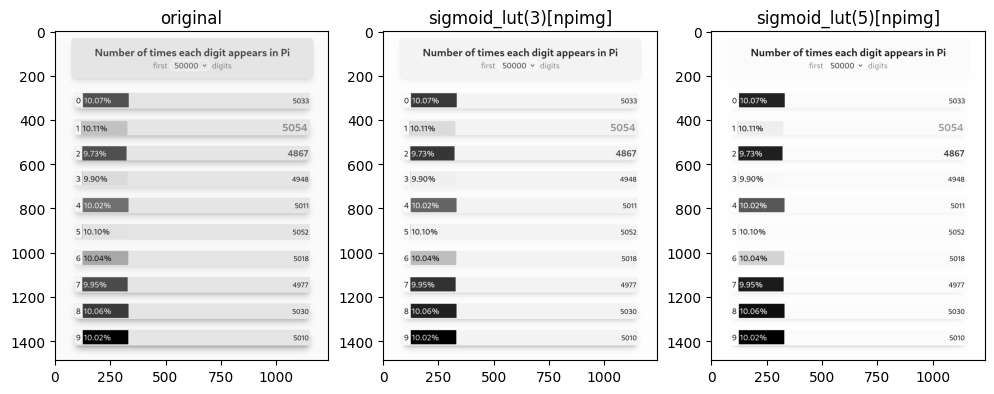

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12, 10))
ax[0].imshow(npimg, cmap='gray')
ax[0].set_title('original')
ax[1].imshow(sigmoid_lut(3)[npimg], cmap='gray')
ax[1].set_title('sigmoid_lut(3)[npimg]')
ax[2].imshow(sigmoid_lut(5)[npimg], cmap='gray')
ax[2].set_title('sigmoid_lut(5)[npimg]')

''
